In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


In [2]:
# reading csv file  

test=pd.read_csv("mitbih_test.csv",header=None) 
train=pd.read_csv("mitbih_train.csv",header=None) 
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

#print("Type\tCount")
#print((train[187]).value_counts())

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in trainining dataset
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
*************************************
Count of all classes in trainining dataset
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [3]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187] 
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187] 
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187] 
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187] 
print("labels_test shape : ",labels_test.shape)
      


train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [4]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data

In [5]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
#from keras.initializers import glorot_normal

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
# here we are having a class number for each image
print("Class label of first image :", labels_train[83456])

Y_train = np_utils.to_categorical(labels_train)
print("After converting the output into a vector : ",Y_train[83456])

Y_test = np_utils.to_categorical(labels_test)

Class label of first image : 4.0
After converting the output into a vector :  [0. 0. 0. 0. 1.]


In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

output_dim = 5
input_dim = feature_train.shape[1]

#batch_size = 128 
#nb_epoch = 20

batch_size = 512
nb_epoch = 500

In [9]:
print("feature_train",feature_train.shape)
print("Y_train",Y_train)
print("feature_test",feature_test.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 187)
Y_train [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
feature_test (21892, 187)
Y_test (21892, 5)


In [11]:
# 5. MLP + ReLU + ADAM

model_relu_ADAM = Sequential()
model_relu_ADAM.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu_ADAM.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu_ADAM.add(Dense(output_dim, activation='softmax'))

print(model_relu_ADAM.summary())

model_relu_ADAM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_ADAM.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               24064     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 32,645
Trainable params: 32,645
Non-trainable params: 0
_________________________________________________________________
None

Train on 87554 samples, validate on 21892 samples
Epoch 1/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.2948 - accuracy: 0.9200 - val_loss: 0.1751 - val_accuracy: 0.9541
Epoch 2/500
87554/87554 [==============================] - 1s 14us/step - loss: 0.1489 - accuracy: 0.9601 - val_loss: 0.1386 - val_accuracy: 0.9628
Epoch 3/500
87554/87554 [===

87554/87554 [==============================] - 2s 24us/step - loss: 0.0205 - accuracy: 0.9932 - val_loss: 0.1123 - val_accuracy: 0.9797
Epoch 50/500
87554/87554 [==============================] - 5s 52us/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.1166 - val_accuracy: 0.9785
Epoch 51/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0187 - accuracy: 0.9937 - val_loss: 0.1191 - val_accuracy: 0.9800
Epoch 52/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.1216 - val_accuracy: 0.9794
Epoch 53/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0159 - accuracy: 0.9945 - val_loss: 0.1250 - val_accuracy: 0.9784
Epoch 54/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.1252 - val_accuracy: 0.9790
Epoch 55/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 

87554/87554 [==============================] - 2s 20us/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.1668 - val_accuracy: 0.9766
Epoch 105/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.1701 - val_accuracy: 0.9785
Epoch 106/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.1671 - val_accuracy: 0.9778
Epoch 107/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.1635 - val_accuracy: 0.9789
Epoch 108/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.1643 - val_accuracy: 0.9780
Epoch 109/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.1671 - val_accuracy: 0.9785
Epoch 110/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0080 - accuracy: 0.9972 - val_

Epoch 159/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.2058 - val_accuracy: 0.9798
Epoch 160/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.0123 - accuracy: 0.9963 - val_loss: 0.1981 - val_accuracy: 0.9789
Epoch 161/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.1905 - val_accuracy: 0.9774
Epoch 162/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.1907 - val_accuracy: 0.9796
Epoch 163/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.1939 - val_accuracy: 0.9794
Epoch 164/500
87554/87554 [==============================] - 1s 14us/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.2202 - val_accuracy: 0.9771
Epoch 165/500
87554/87554 [==============================] - 1s 15us/step - loss: 0.0105 - accuracy:

87554/87554 [==============================] - 2s 18us/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.2529 - val_accuracy: 0.9780
Epoch 214/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.2397 - val_accuracy: 0.9795
Epoch 215/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.2394 - val_accuracy: 0.9795
Epoch 216/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.2448 - val_accuracy: 0.9778
Epoch 217/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.2486 - val_accuracy: 0.9778
Epoch 218/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.2437 - val_accuracy: 0.9794
Epoch 219/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0044 - accuracy: 0.9986 - val_

Epoch 268/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.2874 - val_accuracy: 0.9760
Epoch 269/500
87554/87554 [==============================] - 2s 27us/step - loss: 0.0125 - accuracy: 0.9968 - val_loss: 0.2623 - val_accuracy: 0.9790
Epoch 270/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.2535 - val_accuracy: 0.9790
Epoch 271/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.2470 - val_accuracy: 0.9793
Epoch 272/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.2537 - val_accuracy: 0.9797
Epoch 273/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.2481 - val_accuracy: 0.9797
Epoch 274/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0028 - accuracy:

87554/87554 [==============================] - 2s 23us/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2719 - val_accuracy: 0.9799
Epoch 323/500
87554/87554 [==============================] - 2s 27us/step - loss: 9.2471e-04 - accuracy: 0.9997 - val_loss: 0.2646 - val_accuracy: 0.9797
Epoch 324/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.2682 - val_accuracy: 0.9794
Epoch 325/500
87554/87554 [==============================] - 2s 22us/step - loss: 7.9450e-04 - accuracy: 0.9997 - val_loss: 0.2615 - val_accuracy: 0.9803
Epoch 326/500
87554/87554 [==============================] - 2s 23us/step - loss: 9.6652e-04 - accuracy: 0.9997 - val_loss: 0.2604 - val_accuracy: 0.9801
Epoch 327/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.2657 - val_accuracy: 0.9799
Epoch 328/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0028 - accuracy: 0

87554/87554 [==============================] - 2s 18us/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.2969 - val_accuracy: 0.9792
Epoch 377/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.2959 - val_accuracy: 0.9799
Epoch 378/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.2825 - val_accuracy: 0.9789
Epoch 379/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.2819 - val_accuracy: 0.9795
Epoch 380/500
87554/87554 [==============================] - 2s 19us/step - loss: 6.6419e-04 - accuracy: 0.9998 - val_loss: 0.2834 - val_accuracy: 0.9791
Epoch 381/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.2921 - val_accuracy: 0.9794
Epoch 382/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0018 - accuracy: 0.9994 - 

87554/87554 [==============================] - 1s 14us/step - loss: 0.0155 - accuracy: 0.9964 - val_loss: 0.3136 - val_accuracy: 0.9772
Epoch 431/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.3178 - val_accuracy: 0.9785
Epoch 432/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.3141 - val_accuracy: 0.9796
Epoch 433/500
87554/87554 [==============================] - 1s 12us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.2978 - val_accuracy: 0.9789
Epoch 434/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.2974 - val_accuracy: 0.9792
Epoch 435/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.3072 - val_accuracy: 0.9797
Epoch 436/500
87554/87554 [==============================] - 1s 15us/step - loss: 7.6703e-04 - accuracy: 0.9998 - 

87554/87554 [==============================] - 2s 18us/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.3193 - val_accuracy: 0.9804
Epoch 485/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.3252 - val_accuracy: 0.9795
Epoch 486/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.3262 - val_accuracy: 0.9803
Epoch 487/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.3244 - val_accuracy: 0.9779
Epoch 488/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.3309 - val_accuracy: 0.9801
Epoch 489/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.3113 - val_accuracy: 0.9786
Epoch 490/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0031 - accuracy: 0.9993 - val_

In [12]:
y_pred = model_relu_ADAM.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.84      0.75      0.80       556
           2       0.95      0.94      0.94      1448
           3       0.80      0.75      0.77       162
           4       0.99      0.98      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.88      0.90     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.31290080993886243
Test accuracy: 0.9801297187805176


<IPython.core.display.Javascript object>


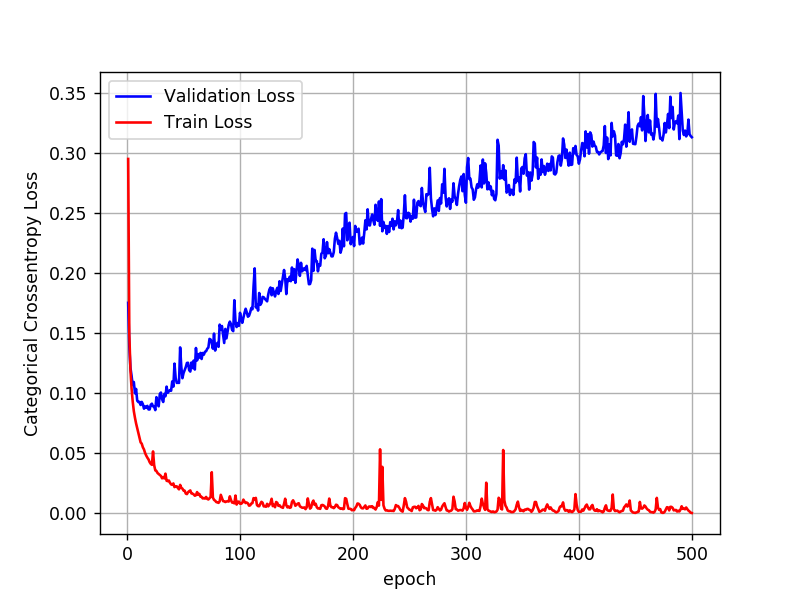

In [13]:
score = model_relu_ADAM.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [14]:
#              precision    recall  f1-score   support

#           0       0.99      0.99      0.99     18118
#           1       0.84      0.75      0.80       556
#           2       0.95      0.94      0.94      1448
#           3       0.80      0.75      0.77       162
#           4       0.99      0.98      0.99      1608

#    accuracy                           0.98     21892
#   macro avg       0.91      0.88      0.90     21892
# weighted avg       0.98      0.98      0.98     21892

# Test score: 0.31290080993886243
# Test accuracy: 0.9801297187805176